## Comparison with ordinary QM 

Conversions from symbolic to numeric (including implicit one) for plotting seems problematic, either with `subs()` or `lambdify()`, therefore we start over, with a new nb. We also assume
\begin{equation*}
    \hbar = \omega = 1 \,\text{.}
\end{equation*}

In [1]:
import numpy as np
from scipy.linalg import expm

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
Hs = np.array([
    [0, 1j],
    [-1j, 0]
])

In [5]:
def evolve_psi(t, t0, psi0):
    return expm(-1j*Hs*(t-t0)).dot(psi0)

In [6]:
def correction_eigenJ(t, t0, eigenvalue):
    return np.exp(1j*eigenvalue*(t-t0))

In [7]:
def correction_timeshift(t, t0, timeshift):
    deltaT = np.pi/2
    omega_prime = (np.pi*timeshift) / (deltaT**2)
    return np.exp(-1j*omega_prime*(t-t0))

In [8]:
def psi_fixed(t, t0, psi0, eigenvalue):
    return evolve_psi(t, t0, psi0) * correction_eigenJ(t, t0, eigenvalue) * correction_timeshift(t, t0, t0)

In [9]:
def psi_fixed_0_re(t, t0, psi0, eigenvalue):
    return np.real(psi_fixed(t, t0, psi0, eigenvalue)[0])

In [10]:
def psi_fixed_0_im(t, t0, psi0, eigenvalue):
    return np.imag(psi_fixed(t, t0, psi0, eigenvalue)[0])

In [16]:
def psi_fixed_1_re(t, t0, psi0, eigenvalue):
    return np.real(psi_fixed(t, t0, psi0, eigenvalue)[1])

In [17]:
def psi_fixed_1_im(t, t0, psi0, eigenvalue):
    return np.imag(psi_fixed(t, t0, psi0, eigenvalue)[1])

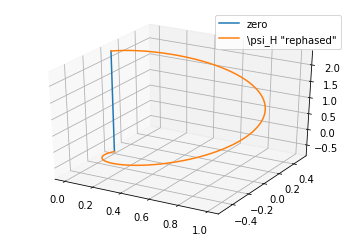

In [23]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
# z is t
z = np.linspace(-np.pi/4, 3*np.pi/4, 500)

# Auto-broadcasting doesn't work as expected, therefore we explicitly
# map the z vector via `np.vectorize()`

# x is real part of psi[0] or Re(psi_H) as in psi = psi_H|H> + psi_V|V>
x = np.vectorize(lambda t: psi_fixed_0_re(t, -np.pi/4, [0, -1j], 0))(z) 
# y is imag part of psi[0] or Im(psi_H) as in psi = psi_H|H> + psi_V|V>
y = np.vectorize(lambda t: psi_fixed_0_im(t, -np.pi/4, [0, -1j], 0))(z) 

zero = z - z

ax.plot(zero, zero, z, label='zero')
ax.plot(x, y, z, label='\psi_H "rephased"')

ax.legend()

plt.show()


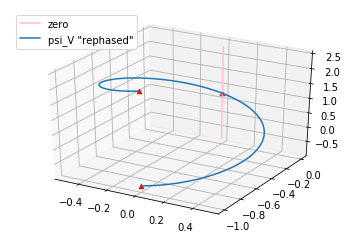

In [53]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
# z is t
z = np.linspace(-np.pi/4, 3*np.pi/4, 500)

# Auto-broadcasting doesn't work as expected, therefore we explicitly
# map the z vector via `np.vectorize()`

# x is real part of psi[1] or Re(psi_V) as in psi = psi_H|H> + psi_V|V>
x = np.vectorize(lambda t: psi_fixed_1_re(t, -np.pi/4, [0, -1j], 0))(z) 
# y is imag part of psi[0] or Im(psi_H) as in psi = psi_H|H> + ps_V|V>
y = np.vectorize(lambda t: psi_fixed_1_im(t, -np.pi/4, [0, -1j], 0))(z) 

zero = z - z


ax.plot(zero, zero, z, label='zero', c='pink')

ax.plot(x, y, z, label='psi_V "rephased"')

ax.scatter(0.0, -1.0,  -np.pi/4, marker='^', c='red')
ax.scatter(0.0,  0.0,   np.pi/4, marker='^', c='red')
ax.scatter(0.0, -1.0, 3*np.pi/4, marker='^', c='red')

ax.legend()

plt.show()
